In [8]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize 
from nltk.tokenize import word_tokenize 
import re
from nltk.tokenize import regexp_tokenize 
from matplotlib import pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
df = pd.read_csv('ted_main.csv')

In [10]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [172]:
from IPython.display import Image
Image(filename='LDA_clusters.png', width=1000)

FileNotFoundError: [Errno 2] No such file or directory: 'LDA_clusters.png'

In [15]:
df[df.event.str.contains("x|X", na=False)].shape

(474, 17)

In [5]:
tr = pd.read_csv('transcripts.csv')

In [147]:
tr.shape

(2467, 2)

In [70]:
tr.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [148]:
#tr.transcript[1]

## Outline of what I'm doing
- Counter
- simple text prepeocessing
- gensim

In [6]:
from collections import Counter

# Tokenize the first ted talk: tokens
tokens = word_tokenize(tr.iloc[0][0])

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(100))


[(',', 240), ('.', 205), ('the', 153), ('and', 101), ('to', 80), ('you', 79), ('of', 74), ('a', 74), ('we', 62), ('i', 61), ('in', 55), ('it', 51), ('is', 51), ('that', 46), ("'s", 45), ('was', 45), ('they', 44), ('(', 43), (')', 43), ("n't", 42), ('``', 41), ('she', 41), ('?', 39), ('laughter', 39), ('this', 30), ("''", 29), ('on', 28), ('have', 26), ('think', 26), ('do', 24), ('if', 24), ('all', 22), ('education', 22), ('said', 22), ('he', 22), ('are', 21), ('at', 21), ('about', 20), ("'re", 20), ('be', 19), ('but', 18), ('for', 18), ('did', 17), ('her', 17), ('what', 16), ('people', 16), ('there', 15), ('—', 15), ('one', 14), ('their', 14), ('so', 14), ('our', 14), ('had', 13), ('not', 13), ('by', 12), ('because', 12), ('who', 12), ('as', 12), ('know', 11), ('from', 11), ('were', 11), (';', 11), ('which', 10), ('say', 10), ('my', 10), ('out', 10), ('with', 10), ('being', 10), ('want', 9), ('an', 9), ('like', 9), ('things', 9), ('school', 9), ('now', 9), ('just', 8), ('them', 8), ('r

In [65]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cristina/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [151]:
from nltk.corpus import stopwords
tokens = [w for w in word_tokenize(tr.transcript[2].lower()) if w.isalpha()]
no_stops = [t for t in tokens if t not in stopwords.words('english')]
Counter(no_stops).most_common(10)


[('laughter', 38),
 ('like', 22),
 ('one', 20),
 ('software', 18),
 ('microsoft', 13),
 ('get', 12),
 ('applause', 12),
 ('new', 12),
 ('put', 12),
 ('know', 12)]

#### tokenize the first transcript

In [34]:
words = word_tokenize(tr.iloc[0][0])
len(set(words))

897

#### tf-idf

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [46]:
text=tr['transcript'].tolist()
tfidf=TfidfVectorizer(input=text,stop_words="english")
matrix=tfidf.fit_transform(text)
print(matrix.shape)

(2467, 58489)


In [143]:
#let's get feature names
vocabulary = tfidf.get_feature_names() 
        

In [169]:
# let's check how many digits or non eng words
regex = re.compile("[^A-Za-z]+")
count = 0
vocabulary_non_english_or_digits = []
for i in vocabulary:
    match = re.search(regex, i)
    if match:
        vocabulary_non_english_or_digits.append(match.group())           
        count +=1
print(f'count of features that are non-eng or digits: {count}')
print(f'total count of features: {len(vocabulary)}')
print(vocabulary_non_english_or_digits)

count of features that are non-eng or digits: 1633
total count of features: 58489
['00', '000', '0000', '000000004', '0000001', '000001', '00001', '000042', '0001', '0009', '000', '001', '0015', '003', '004', '004867', '005', '005545', '005634', '005961', '006', '007', '007080', '008106', '008309', '008494', '01', '0111', '02', '020', '024', '025', '03', '034', '035', '04', '040', '0400', '041', '047', '048', '05', '050', '05049', '051', '052', '06', '064', '07', '077', '08', '080', '09', '098', '0', '0', '10', '100', '1000', '1000', '1000', '100', '100', '101', '10165', '102', '103', '103', '104', '105', '106', '107', '107', '108', '109', '109', '10', '10', '10', '10', '10', '10', '10', '11', '110', '111', '112', '113', '114', '115', '117', '118', '119', '11', '11', '12', '120', '1200', '120', '121', '1214', '122', '1229', '123', '12345678', '124', '124', '125', '1252', '1258', '125', '126', '127', '128', '1280', '129', '1298', '12', '13', '130', '1300', '1300', '130', '1311', '1313',

In [152]:
transcripts_df = pd.DataFrame(matrix.toarray(), columns = vocabulary)


In [159]:

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))


text=tr['transcript'].tolist()
# tf-idf so that is can be used for nmf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,  stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(text)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()


# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(text)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 20

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

/Users/cristina/miniconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
people just going know think really ve time things don
Topic 1:
women men girls woman sex gender girl female boys violence
Topic 2:
laughter said know don oh yeah applause ok just got
Topic 3:
music applause guitar sound play ends musical song orchestra classical
Topic 4:
cells stem cell tissue organs bone body liver disease lab
Topic 5:
water ocean fish sea species coral ice climate planet animals
Topic 6:
consciousness conscious subjective science fundamental cube objective consciously theory laws
Topic 7:
design designers building architecture designing designer designed kind buildings moma
Topic 8:
brain neurons brains cortex neuron neuroscience body activity memory disorders
Topic 9:
kids school education children teachers students schools teacher learning classroom
Topic 10:
universe stars galaxies galaxy telescope planets light space earth dark
Topic 11:
robot robots robotics locomotion ai robotic autonomous build machines intelligence
Topic 12:
data information web alg

### vectorizer



In [ ]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [6]:
scene_one = '''SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop clop clop] 
SOLDIER #1: Halt!  Who goes there?
ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!
SOLDIER #1: Pull the other one!
ARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.
SOLDIER #1: What?  Ridden on a horse?
ARTHUR: Yes!
SOLDIER #1: You're using coconuts!
ARTHUR: What?
SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.
ARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--
SOLDIER #1: Where'd you get the coconuts?
ARTHUR: We found them.
SOLDIER #1: Found them?  In Mercea?  The coconut's tropical!
ARTHUR: What do you mean?
SOLDIER #1: Well, this is a temperate zone.
ARTHUR: The swallow may fly south with the sun or the house martin or the plover may seek warmer climes in winter, yet these are not strangers to our land?
SOLDIER #1: Are you suggesting coconuts migrate?
ARTHUR: Not at all.  They could be carried.
SOLDIER #1: What?  A swallow carrying a coconut?
ARTHUR: It could grip it by the husk!
SOLDIER #1: It's not a question of where he grips it!  It's a simple question of weight ratios!  A five ounce bird could not carry a one pound coconut.
ARTHUR: Well, it doesn't matter.  Will you go and tell your master that Arthur from the Court of Camelot is here.
SOLDIER #1: Listen.  In order to maintain air-speed velocity, a swallow needs to beat its wings forty-three times every second, right?
ARTHUR: Please!
SOLDIER #1: Am I right?
ARTHUR: I'm not interested!
SOLDIER #2: It could be carried by an African swallow!
SOLDIER #1: Oh, yeah, an African swallow maybe, but not a European swallow.  That's my point.
SOLDIER #2: Oh, yeah, I agree with that.
ARTHUR: Will you ask your master if he wants to join my court at Camelot?!
SOLDIER #1: But then of course a-- African swallows are non-migratory.
SOLDIER #2: Oh, yeah...
SOLDIER #1: So they couldn't bring a coconut back anyway...  [clop clop clop] 
SOLDIER #2: Wait a minute!  Supposing two swallows carried it together?
SOLDIER #1: No, they'd have to have it on a line.
SOLDIER #2: Well, simple!  They'd just use a strand of creeper!
SOLDIER #1: What, held under the dorsal guiding feathers?
SOLDIER #2: Well, why not?'''

In [11]:
# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)

# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[4])

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(sentences)
print('*'*100)
print(tokenized_sent)
print('*'*100)
print(unique_tokens)


['SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!', '[clop clop clop] \nSOLDIER #1: Halt!', 'Who goes there?', 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.', 'King of the Britons, defeator of the Saxons, sovereign of all England!', 'SOLDIER #1: Pull the other one!', 'ARTHUR: I am, ...  and this is my trusty servant Patsy.', 'We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.', 'I must speak with your lord and master.', 'SOLDIER #1: What?', 'Ridden on a horse?', 'ARTHUR: Yes!', "SOLDIER #1: You're using coconuts!", 'ARTHUR: What?', "SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.", 'ARTHUR: So?', "We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?", 'ARTHUR: We found them.', 'SOLDIER #1: Found them?', 'In Mercea?', "The coconut's tropical!", 'ARTHUR: What 

In [15]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*\]"

# Use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one))

# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w\s]+:"
print(re.match(pattern2, sentences[3]))


580 588
<_sre.SRE_Match object; span=(9, 32), match='[wind] [clop clop clop]'>
<_sre.SRE_Match object; span=(0, 7), match='ARTHUR:'>


In [18]:
my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"
pattern = r"(\w+|#\d|\?|!)"
regexp_tokenize(my_string, pattern)

['SOLDIER',
 '#1',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 's',
 'tropical',
 '!']

In [19]:
tweets = ['This is the best #nlp exercise ive found online! #python', '#NLP is super fun! <3 #learning', 'Thanks @datacamp :) #nlp #python']

In [25]:
# Import the necessary modules
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import regexp_tokenize

# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"

# Use the pattern on the first tweet in the tweets list
print(regexp_tokenize(tweets[1], pattern1))

# Write a pattern that matches both mentions and hashtags
pattern2 = r"([#@]\w+)"

# Use the pattern on the last tweet in the tweets list
print(regexp_tokenize(tweets[-1], pattern2))

# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer(tweets)
all_tokens = [tknzr for t in tweets]
print(all_tokens)

['#NLP', '#learning']
['@datacamp', '#nlp', '#python']
[<nltk.tokenize.casual.TweetTokenizer object at 0x1a0bc00160>, <nltk.tokenize.casual.TweetTokenizer object at 0x1a0bc00160>, <nltk.tokenize.casual.TweetTokenizer object at 0x1a0bc00160>]


In [30]:
holy_grail = '''ZOOT: Oh, you have suffered much.  You are delirious.
GALAHAD: No, look.  I have seen it!  It is here, in this--
ZOOT: Sir Galahad!  You would not be so ungallant as to refuse our hospitality.
GALAHAD: Well, I-- I-- uh--
ZOOT: Oh, I am afraid our life must seem very dull and quiet compared to yours.  We are but eight score young blondes and brunettes, all between sixteen and nineteen-and-a-half, cut off in this castle with no one to protect us.  Oooh.  It is a lonely life: bathing, dressing, undressing, making exciting underwear.  We are just not used to handsome knights.  Nay.  Nay.  Come.  Come.  You may lie here.  Oh, but you are wounded!
GALAHAD: No, no-- it's-- it's nothing.
ZOOT: Oh, you must see the doctors immediately!  No, no, please!  Lie down. [clap clap] 
PIGLET: Well, what seems to be the trouble?
GALAHAD: They're doctors?!
ZOOT: Uh, they have a basic medical training, yes.
GALAHAD: B-- but--
ZOOT: Oh, come, come.  You must try to rest.  Doctor Piglet!  Doctor Winston!  Practice your art.
WINSTON: Try to relax.
GALAHAD: Are you sure that's absolutely necessary?
PIGLET: We must examine you.
GALAHAD: There's nothing wrong with that!
PIGLET: Please.  We are doctors.
GALAHAD: Look!  This cannot be.  I am sworn to chastity.
PIGLET: Back to your bed!  At once!
GALAHAD: Torment me no longer.  I have seen the Grail!
PIGLET: There's no grail here.
GALAHAD: I have seen it!  I have seen it! [clank] I have seen--
GIRLS: Hello.
GALAHAD: Oh.
GIRLS: Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.
GALAHAD: Zoot!
DINGO: No, I am Zoot's identical twin sister, Dingo.
GALAHAD: Oh, well, excuse me, I--
DINGO: Where are you going?
GALAHAD: I seek the Grail!  I have seen it, here in this castle!
DINGO: Oh no.  Oh, no!  Bad, bad Zoot!
GALAHAD: Well, what is it?
DINGO: Oh, wicked, bad, naughty Zoot!  She has been setting alight to our beacon, which, I have just remembered, is grail-shaped.  It's not the first time we've had this problem.
GALAHAD: It's not the real Grail?
DINGO: Oh, wicked, bad, naughty, evil Zoot!  She is a bad person and must pay the penalty.  Do you think this scene should have been cut?  We were so worried when the boys were writing it, but now, we're glad.  It's better than some of the previous scenes, I think.
LEFT HEAD: At least ours was better visually.
DENNIS: Well, at least ours was committed.  It wasn't just a string of pussy jokes.
OLD MAN: Get on with it.
TIM THE ENCHANTER: Yes, get on with it!
ARMY OF KNIGHTS: Yes, get on with it!
DINGO: Oh, I am enjoying this scene.
GOD: Get on with it!
DINGO: [sigh] Oh, wicked, wicked Zoot.  Oh, she is a naughty person, and she must pay the penalty.  And here in Castle Anthrax, we have but one punishment for setting alight the grail-shaped beacon.  You must tie her down on a bed and spank her.
GIRLS: A spanking!  A spanking!
DINGO: You must spank her well.  And after you have spanked her, you may deal with her as you like.  And then, spank me.
AMAZING: And spank me.
STUNNER: And me.
LOVELY: And me.
DINGO: Yes, yes, you must give us all a good spanking!
GIRLS: A spanking!  A spanking!  There is going to be a spanking tonight!
DINGO: And after the spanking, the oral sex.
GIRLS: The oral sex!  The oral sex!
GALAHAD: Well, I could stay a bit longer.
LAUNCELOT: Sir Galahad!
GALAHAD: Oh, hello.
LAUNCELOT: Quick!
GALAHAD: What?
LAUNCELOT: Quick!
GALAHAD: Why?
LAUNCELOT: You are in great peril!
DINGO: No he isn't.
LAUNCELOT: Silence, foul temptress!
GALAHAD: You know, she's got a point.
LAUNCELOT: Come on!  We will cover your escape!
GALAHAD: Look, I'm fine!
LAUNCELOT: Come on!
GIRLS: Sir Galahad!
GALAHAD: No.  Look, I can tackle this lot single-handed!
DINGO: Yes!  Let him tackle us single-handed!
GIRLS: Yes!  Let him tackle us single-handed!
LAUNCELOT: No, Sir Galahad.  Come on!
GALAHAD: No!  Really!  Honestly, I can cope.  I can handle this lot easily.
DINGO: Oh, yes.  Let him handle us easily.
GIRLS: Yes.  Let him handle us easily.
LAUNCELOT: No.  Quick!  Quick!
GALAHAD: Please!  I can defeat them!  There's only a hundred-and-fifty of them!
DINGO: Yes, yes!  He will beat us easily!  We haven't a chance.
GIRLS: We haven't a chance.  He will beat us easily... [boom] 
DINGO: Oh, shit.
LAUNCELOT: We were in the nick of time.  You were in great peril.
GALAHAD: I don't think I was.
LAUNCELOT: Yes you were.  You were in terrible peril.
GALAHAD: Look, let me go back in there and face the peril.
LAUNCELOT: No, it's too perilous.
GALAHAD: Look, it's my duty as a knight to sample as much peril as I can.
LAUNCELOT: No, we've got to find the Holy Grail.  Come on!
GALAHAD: Oh, let me have just a little bit of peril?
LAUNCELOT: No.  It's unhealthy.
GALAHAD: I bet you're gay.
LAUNCELOT: No I'm not
NARRATOR: Sir Launcelot had saved Sir Galahad from almost certain temptation, but they were still no nearer the Grail.  Meanwhile, King Arthur and Sir Bedevere, not more than a swallow's flight away, had discovered something.  Oh, that's an unladen swallow's flight, obviously.  I mean, they were more than two laden swallows' flights away-- four, really, if they had a coconut on a line between them.  I mean, if the birds were walking and dragging--
CROWD: Get on with it!
NARRATOR: Oh, anyway.  On to scene twenty-four, which is a smashing scene with some lovely acting, in which Arthur discovers a vital clue, and in which there aren't any swallows, although I think you can hear a starling-- oooh
SCENE 12:
OLD MAN: Heh, hee ha ha hee hee!  Hee hee hee ha ha ha...
ARTHUR: And this enchanter of whom you speak, he has seen the Grail?
OLD MAN: ... Ha ha ha ha!  Heh, hee ha ha hee!  Ha hee ha!  Ha ha ha ha...
ARTHUR: Where does he live?
OLD MAN: ... Heh heh heh heh...
ARTHUR: Old man, where does he live?
OLD MAN: ... Hee ha ha ha.  He knows of a cave, a cave which no man has entered.
ARTHUR: And the Grail.  The Grail is there?
OLD MAN: There is much danger, for beyond the cave lies the Gorge of Eternal Peril, which no man has ever crossed.
ARTHUR: But the Grail!  Where is the Grail?!
OLD MAN: Seek you the Bridge of Death.
ARTHUR: The Bridge of Death, which leads to the Grail?
OLD MAN: Heh, hee hee hee hee!  Ha ha ha ha ha!  Hee ha ha..
SCENE 13: [spooky music] [music stops] 
HEAD KNIGHT OF NI: Ni!
KNIGHTS OF NI: Ni!  Ni!  Ni!  Ni!  Ni!
ARTHUR: Who are you?
HEAD KNIGHT: We are the Knights Who Say...  'Ni'!
RANDOM: Ni!
ARTHUR: No!  Not the Knights Who Say 'Ni'!
HEAD KNIGHT: The same!
BEDEVERE: Who are they?
HEAD KNIGHT: We are the keepers of the sacred words: Ni, Peng, and Neee-wom!
RANDOM: Neee-wom!
ARTHUR: Those who hear them seldom live to tell the tale!
HEAD KNIGHT: The Knights Who Say 'Ni' demand a sacrifice!
ARTHUR: Knights of Ni, we are but simple travellers who seek the enchanter who lives beyond these woods.
HEAD KNIGHT: Ni!
KNIGHTS OF NI: Ni!  Ni!  Ni!  Ni!  Ni! ...
ARTHUR: Ow!  Ow!  Ow!  Agh!
HEAD KNIGHT: We shall say 'ni' again to you if you do not appease us.
ARTHUR: Well, what is it you want?
HEAD KNIGHT: We want...  a shrubbery! [dramatic chord] 
ARTHUR: A what?
KNIGHTS OF NI: Ni!  Ni!  Ni!  Ni!
ARTHUR and PARTY: Ow!  Oh!
ARTHUR: Please, please!  No more!  We will find you a shrubbery.
HEAD KNIGHT: You must return here with a shrubbery or else you will never pass through this wood alive!
ARTHUR: O Knights of Ni, you are just and fair, and we will return with a shrubbery.
HEAD KNIGHT: One that looks nice.
ARTHUR: Of course.
HEAD KNIGHT: And not too expensive.
ARTHUR: Yes.
HEAD KNIGHT: Now...  go [trumpets] 
CARTOON CHARACTER: Hmm hmm-- [boom] Oh!  Great scott!  Hm.  Hmm. [boom] Hm!  Hmm.  [mumble mumble mumble] [boom] [mumble mumble mumble] [boom] [mumble mumble mumble] [boom] [mumble mumble mumble] [boom] [mumble mumble mumble] [boom] [mumble mumble mumble] [boom] [mumble mumble mumble] [boom] [mumble mumble mumble] [boom] Ohh! [crash] [mumble mumble mumble] [boom] 
SUN: Ay, up!  Thsss. [boom] Ayy, up! [boom] Thsss. [boom] Ayy, up!
CARTOON CHARACTER: Stop that!  Stop that! [boom] 
SUN: Ay, up!
CARTOON CHARACTER: Stop that! [boom] Look on!  Clear off!  Go on!  Go away!  Go away!  Go away!  And you!  Clear off!  [sniff] 
SUN: [mumble mumble mumble] [bells] 
CARTOON CHARACTER: Hah.  Bloody weather
SCENE 14:
NARRATOR: The Tale of Sir Launcelot.
FATHER: One day, lad, all this will be yours!
PRINCE HERBERT: What, the curtains?
FATHER: No.  Not the curtains, lad.  All that you can see, stretched out over the hills and valleys of this land!  This'll be your kingdom, lad.
HERBERT: But Mother--
FATHER: Father, lad.  Father.
HERBERT: B-- b-- but Father, I don't want any of that.
FATHER: Listen, lad.  I built this kingdom up from nothing.  When I started here, all there was was swamp.  Other kings said I was daft to build a castle on a swamp, but I built it all the same, just to show 'em.  It sank into the swamp.  So, I built a second one.  That sank into the swamp.  So I built a third one.  That burned down, fell over, then sank into the swamp.  But the fourth one...  stayed up!  And that's what you're gonna get, lad: the strongest castle in these islands.
HERBERT: But I don't want any of that.  I'd rather--
FATHER: Rather what?!
HERBERT: I'd rather... [music] ... just...  sing!
FATHER: Stop that!  Stop that!  You're not going into a song while I'm here.  Now listen, lad.  In twenty minutes you're getting married to a girl whose father owns the biggest tracts of open land in Britain.
HERBERT: B-- but I don't want land.
FATHER: Listen, Alice,--
HERBERT: Herbert.
FATHER: 'Erbert.  We live in a bloody swamp.  We need all the land we can get.
HERBERT: But-- but I don't like her.
FATHER: Don't like her?!  What's wrong with her?!  She's beautiful.  She's rich.  She's got huge...  tracts o' land.
HERBERT: I know, but I want the-- the girl that I marry to have...  [music] ... a certain...  special...  something!
FATHER: Cut that out!  Cut that out!  Look, you're marrying Princess Lucky, so you'd better get used to the idea! [smack] Guards!  Make sure the Prince doesn't leave this room until I come and get him.
GUARD #1: Not to leave the room even if you come and get him.
GUARD #2: Hic!
FATHER: No, no.  Until I come and get him.
GUARD #1: Until you come and get him, we're not to enter the room.
FATHER: No, no.  No.  You stay in the room and make sure he doesn't leave.
GUARD #1: And you'll come and get him.
GUARD #2: Hic!
FATHER: Right.
GUARD #1: We don't need to do anything, apart from just stop him entering the room.
FATHER: No, no.  Leaving the room.
GUARD #1: Leaving the room.  Yes. [sniff] 
FATHER: All right?
GUARD #1: Right.
GUARD #2: Hic!
FATHER: Right.
GUARD #1: Oh, if-- if-- if-- uhh-- if-- if-- w-- ehh-- i-- if-- if we--
FATHER: Yes?  What is it?
GUARD #1: Oh, i-- if-- i-- oh--
FATHER: Look, it's quite simple.
GUARD #1: Uh...
FATHER: You just stay here, and make sure 'e doesn't leave the room.  Alright?
GUARD #2: Hic!
FATHER: Right.
GUARD #1: Oh, I remember.  Uhh, can he leave the room with us?
FATHER: N-- no no.  No.  You just keep him in here, and make sure he--
GUARD #1: Oh, yes.  We'll keep him in here, obviously.  But if he had to leave and we were with him--
FATHER: No, no, no, no.  Just keep him in here--
GUARD #1: Until you, or anyone else--
FATHER: No, not anyone else.  Just me.
GUARD #1: Just you.
GUARD #2: Hic!
FATHER: Get back.
GUARD #1: Get back.
FATHER: All right?
GUARD #1: Right.  We'll stay here until you get back.
GUARD #2: Hic!
FATHER: And, uh, make sure he doesn't leave.
GUARD #1: What?
FATHER: Make sure 'e doesn't leave.
GUARD #1: The Prince?
FATHER: Yes.  Make sure 'e doesn't leave.
GUARD #1: Oh, yes, of course.  
GUARD #2: Hic!
GUARD #1: Ah.  I thought you meant him.  You know, it seemed a bit daft me havin' to guard him when he's a guard.
FATHER: Is that clear?
GUARD #2: Hic!
GUARD #1: Oh, quite clear.  No problems.
FATHER: Right.  Where are you going?
GUARD #1: We're coming with you.
FATHER: No, no.  I want you to stay here and make sure 'e doesn't leave.
GUARD #1: Oh, I see.  Right.
HERBERT: But Father!
FATHER: Shut your noise, you!  And get that suit on! [music] And no singing!
GUARD #2: Hic!
FATHER: Oh, go and get a glass of water. [clank] [scribble scribble scribble fold fold] [twong]
SCENE 15:
LAUNCELOT: Well taken, Concorde!
CONCORDE: Thank you, sir!  Most kind.
LAUNCELOT: And again!  Over we go!  Good.  Steady!  And now, the big one!  Uuh!  Come on, Concorde! [thwonk] 
CONCORDE: Message for you, sir. [fwump] 
LAUNCELOT: Concorde!  Concorde!  Speak to me!  'To whoever finds this note: I have been imprisoned by my father, who wishes me to marry against my will.  Please, please, please come and rescue me.  I am in the Tall Tower of Swamp Castle.' At last!  A call!  A cry of distress!  This could be the sign that leads us to the Holy Grail!  Brave, brave Concorde, you shall not have died in vain!
CONCORDE: Uh, I'm-- I'm not quite dead, sir.
LAUNCELOT: Well, you shall not have been mortally wounded in vain!
CONCORDE: I-- I-- I think I c-- I could pull through, sir.
LAUNCELOT: Oh, I see.
CONCORDE: Actually, I think I'm all right to come with you, sir--
LAUNCELOT: No, no, sweet Concorde!  Stay here!  I will send help as soon as I have accomplished a daring and heroic rescue in my own particular...  [sigh] 
CONCORDE: Idiom, sir?
LAUNCELOT: Idiom!
CONCORDE: No, I feel fine, actually, sir.
LAUNCELOT: Farewell, sweet Concorde!
CONCORDE: I'll, um, I'll just stay here then.  Shall I, sir?  Yeah
SCENE 16: [inside castle] 
PRINCESS LUCKY and GIRLS: [giggle giggle giggle] [outside castle] 
GUEST: 'Morning!
SENTRY #1: 'Morning.
SENTRY #2: Oooh.
SENTRY #1: [ptoo] 
LAUNCELOT: Ha ha!  Hiyya!
SENTRY #2: Hey!
LAUNCELOT: Hiyya!, Ha!, etc.
PRINCESS LUCKY and GIRLS: [giggle giggle giggle] 
LAUNCELOT: Ha ha!  Huy!
GUESTS: Uuh!  Aaah!
LAUNCELOT: Ha ha!  And take this!  Aah!  Hiyah!  Aah!  Aaah!  Hyy!  Hya!  Hiyya!  Ha! ...
GUARD #1: Now, you're not allowed to enter the room-- aaugh!
LAUNCELOT: O fair one, behold your humble servant Sir Launcelot of Camelot.  I have come to take y-- Oh, I'm terribly sorry.
HERBERT: You got my note!
LAUNCELOT: Uh, well, I-- I got a-- a note.
HERBERT: You've come to rescue me!
LAUNCELOT: Uh, well, no.  You see, I hadn't--
HERBERT: I knew someone would.  I knew that somewhere out there...  [music] 
LAUNCELOT: Well, I--
HERBERT: ... there must be...  someone...
FATHER: Stop that!  Stop that!  Stop it!  Stop it!  Who are you?
HERBERT: I'm your son!
FATHER: No, not you.
LAUNCELOT: Uh, I am Sir Launcelot, sir.
HERBERT: He's come to rescue me, Father.
LAUNCELOT: Well, let's not jump to conclusions.
FATHER: Did you kill all those guards?
LAUNCELOT: Uh...  Oh, yes.  Sorry.
FATHER: They cost fifty pounds each!
LAUNCELOT: Well, I'm awfully sorry.  Um, I really can explain everything.
HERBERT: Don't be afraid of him, Sir Launcelot.  I've got a rope all ready.
FATHER: You killed eight wedding guests in all!
LAUNCELOT: Well, uh, you see, the thing is, I thought your son was a lady.
FATHER: I can understand that.
HERBERT: Hurry, Sir Launcelot!  Hurry!
FATHER: Shut up!  You only killed the bride's father, that's all!
LAUNCELOT: Well, I really didn't mean to...
FATHER: Didn't mean to?!  You put your sword right through his head!
LAUNCELOT: Oh, dear.  Is he all right?
FATHER: You even kicked the bride in the chest!  This is going to cost me a fortune!
LAUNCELOT: Well, I can explain.  I was in the forest, um, riding north from Camelot, when I got this note, you see--
FATHER: Camelot?  Are you from, uh, Camelot?
HERBERT: Hurry, Sir Launcelot!
LAUNCELOT: Uh, I am a Knight of King Arthur, sir.
FATHER: Very nice castle, Camelot.  Uh, very good pig country...
LAUNCELOT: Is it?
HERBERT: Hurry!  I'm ready!
FATHER: Would you, uh, like to come and have a drink?
LAUNCELOT: Well, that-- that's, uh, awfully nice of you, ...
HERBERT: I am ready!
LAUNCELOT: ... um, I mean to be so understanding. [thonk] Um, ... [woosh] 
HERBERT: Oooh!
LAUNCELOT: ... I'm afraid when I'm in this idiom, I sometimes get a bit, uh, sort of carried away.
FATHER: Oh, don't worry about that.
HERBERT: Oooh! [splat] 
SCENE 17:
GUESTS: [crying] 
FATHER: Well, this is the main hall.  We're going to have all this knocked through, and made into one big, uh, living room.
GUEST: There he is!
FATHER: Oh, bloody hell.
LAUNCELOT: Ha ha ha!  Hey!  Ha ha!
FATHER: Hold it!  Stop it!  Hold it!  Hold it!  Hold it!  Hold it!  Hold it!  Please!
LAUNCELOT: Sorry.  Sorry.  You see what I mean?  I just get carried away.  I'm really most awfully sorry.  Sorry!  Sorry, everyone.
GUEST #1: He's killed the best man!
GUESTS: [yelling] 
FATHER: Hold it!  Hold it!  Please!  Hold it!  This is Sir Launcelot from the Court of Camelot, a very brave and influential knight, and my special guest here today.
LAUNCELOT: Hello.
GUEST: He killed my auntie!
GUESTS: [yelling] 
FATHER: Please!  Please!  This is supposed to be a happy occasion!  Let's not bicker and argue about who killed who.  We are here today to witness the union of two young people in the joyful bond of the holy wedlock.  Unfortunately, one of them, my son Herbert, has just fallen to his death.
GUESTS: Oh!  Oh no!
FATHER: But I don't want to think I've not lost a son, so much as...  gained a daughter! [clap clap clap] For, since the tragic death of her father--
GUEST #2: He's not quite dead!
FATHER: Since the near fatal wounding of her father--
GUEST #2: He's getting better!
FATHER: For, since her own father, who, when he seemed about to recover, suddenly felt the icy hand of death upon him.
BRIDE'S FATHER: Uugh!
GUEST #2: Oh, he's died!
FATHER: And I want his only daughter to look upon me as her old dad, in a very real, and legally binding sense. [clap clap clap] And I feel sure that the merger-- er, the union between the Princess and the brave, but dangerous, Sir Launcelot of Camelot--
LAUNCELOT: What?
GUEST #2: Look!  The dead Prince!
GUESTS: Oooh!  The dead Prince!
CONCORDE: He's not quite dead.
HERBERT: No, I feel much better.
FATHER: You fell out of the Tall Tower, you creep!
HERBERT: No, I was saved at the last minute.
FATHER: How?!
HERBERT: Well, I'll tell you. [music] 
FATHER: Not like that!  Not like that!  No!  Stop it!
GUESTS: [singing] He's going to tell!  He's going to tell! ...
FATHER: Shut uuup!
GUESTS: [singing] He's going to tell! ...
FATHER: Shut up!
GUESTS: [singing] He's going to tell! ...
FATHER: Shut up!
GUESTS: [singing] He's going to tell! ...
FATHER: Not like that!
GUESTS: [singing] He's going to tell!  He's going to tell!  He's going to tell!  He's going to tell! ...
CONCORDE: Quickly, sir!
GUESTS: [singing] He's going to tell! ...
CONCORDE: Come this way!
GUESTS: [singing] He's going to tell!  He's going to tell! ...
LAUNCELOT: No!  It's not right for my idiom!
GUESTS: [singing] He's going to tell about his great escape...
LAUNCELOT: I must escape more...  [sigh] 
GUESTS: [singing] Oh, he fell a long, long way...
CONCORDE: Dramatically, sir?
LAUNCELOT: Dramatically!
GUESTS: [singing] But he's here with us today...
LAUNCELOT: Heee!  Hoa! [crash] Hoo!
GUESTS: [singing] What a wonderful escape!
LAUNCELOT: Excuse me.  Could, uh-- could somebody give me a push, please
SCENE 18: [King Arthur music] [clop clop clop] [rewr!  rewr!  rewr!  rewr!  rewr!  rewr!] 
ARTHUR: Old crone! [rewr!] [music stops] Is there anywhere in this town where we could buy a shrubbery? [dramatic chord] 
OLD CRONE: Who sent you?
ARTHUR: The Knights Who Say 'Ni'.
CRONE: Aggh!  No!  Never!  We have no shrubberies here.
ARTHUR: If you do not tell us where we can buy a shrubbery, my friend and I will say...  we will say...  'ni'.
CRONE: Agh!  Do your worst!
ARTHUR: Very well!  If you will not assist us voluntarily, ...  ni!
CRONE: No!  Never!  No shrubberies!
ARTHUR: Ni!
CRONE: [cough] 
BEDEVERE: Nu!
ARTHUR: No, no, no, no...
BEDEVERE: Nu!
ARTHUR: No, it's not that, it's 'ni'.
BEDEVERE: Nu!
ARTHUR: No, no-- 'ni'.  You're not doing it properly.  No.
BEDEVERE: Ni!
ARTHUR and BEDEVERE: Ni!
ARTHUR: That's it.  That's it.  You've got it.
ARTHUR and BEDEVERE: Ni!
CRONE: Ohh!
BEDEVERE: Ni!
ARTHUR: Ni!
CRONE: Agh!
BEDEVERE: Ni!
ARTHUR: Ni!
BEDEVERE: Ni!
ARTHUR: Ni!
BEDEVERE: Ni!
ROGER THE SHRUBBER: Are you saying 'ni' to that old woman?
ARTHUR: Erm, yes.
ROGER: Oh, what sad times are these when passing ruffians can 'ni' at will to old ladies.  There is a pestilence upon this land.  Nothing is sacred. Even those who arrange and design shrubberies are under considerable economic stress at this period in history.
ARTHUR: Did you say 'shrubberies'?
ROGER: Yes.  Shrubberies are my trade.  I am a shrubber.  My name is Roger the Shrubber.  I arrange, design, and sell shrubberies.
BEDEVERE: Ni!
ARTHUR: No!  No, no, no!  No
SCENE 19:
ARTHUR: O Knights of Ni, we have brought you your shrubbery.  May we go now?
HEAD KNIGHT: It is a good shrubbery.  I like the laurels particularly.  But there is one small problem.
ARTHUR: What is that?
HEAD KNIGHT: We are now...  no longer the Knights Who Say 'Ni'.
KNIGHTS OF NI: Ni!  Shh!
HEAD KNIGHT: Shh!  We are now the Knights Who Say 'Ecky-ecky-ecky-ecky-pikang-zoop-boing-goodem-zoo-owli-zhiv'.
RANDOM: Ni!
HEAD KNIGHT: Therefore, we must give you a test.
ARTHUR: What is this test, O Knights of-- Knights Who 'Til Recently Said 'Ni'?
HEAD KNIGHT: Firstly, you must find...  another shrubbery! [dramatic chord] 
ARTHUR: Not another shrubbery!
RANDOM: Ni!
HEAD KNIGHT: Then, when you have found the shrubbery, you must place it here beside this shrubbery, only slightly higher so you get the two-level effect with a little path running down the middle.
KNIGHTS OF NI: A path!  A path!  A path!  Ni!  Shh!  Ni!  Ni!  Ni!  Shh!  Shh! ...
HEAD KNIGHT: Then, when you have found the shrubbery, you must cut down the mightiest tree in the forest...  with...  a herring! [dramatic chord] 
ARTHUR: We shall do no such thing!
HEAD KNIGHT: Oh, please!
ARTHUR: Cut down a tree with a herring?  It can't be done.
KNIGHTS OF NI: Aaaugh!  Aaaugh!
HEAD KNIGHT: Augh!  Ohh!  Don't say that word.
ARTHUR: What word?
HEAD KNIGHT: I cannot tell, suffice to say is one of the words the Knights of Ni cannot hear.
ARTHUR: How can we not say the word if you don't tell us what it is?
KNIGHTS OF NI: Aaaaugh!
HEAD KNIGHT: You said it again!
ARTHUR: What, 'is'?
KNIGHTS OF NI: Agh!  No, not 'is'.
HEAD KNIGHT: No, not 'is'.  You wouldn't get vary far in life not saying 'is'.
KNIGHTS OF NI: No, not 'is'.  Not 'is'.
BEDEVERE: My liege, it's Sir Robin!
MINSTREL: [singing] Packing it in and packing it up, And sneaking away and buggering up, And chickening out and pissing off home, Yes, bravely he is throwing in the sponge.
ARTHUR: Sir Robin!
ROBIN: My liege!  It's good to see you.
HEAD KNIGHT: Now he's said the word!  
ARTHUR: Surely you've not given up your quest for the Holy Grail?
MINSTREL: [singing] He is sneaking away and buggering up--
ROBIN: Shut up!  No, no.  No.  Far from it.
HEAD KNIGHT: He said the word again!
KNIGHTS OF NI: Aaaaugh!
ROBIN: I was looking for it.
KNIGHTS OF NI: Aaaaugh!
ROBIN: Uh, here-- here in this forest.
ARTHUR: No, it is far from this place.
KNIGHTS OF NI: Aaaaugh!
HEAD KNIGHT: Aaaaugh!  Stop saying the word!  The word...
ARTHUR: Oh, stop it!
KNIGHTS OF NI: ... we cannot hear!
HEAD KNIGHT: Ow!  He said it again!
ARTHUR: Patsy!
HEAD KNIGHT: Wait!  I said it!  I said it! [clop clop clop] Ooh!  I said it again!  And there again!  That's three 'it's!  Ohh!
KNIGHTS OF NI: Aaaaugh
NARRATOR: And so, Arthur and Bedevere and Sir Robin set out on their search to find the enchanter of whom the old man had spoken in scene twenty-four.  Beyond the forest they met Launcelot and Galahad, and there was much rejoicing.
KNIGHTS: Yay!  Yay! [woosh] 
NARRATOR: In the frozen land of Nador, they were forced to eat Robin's minstrels.
MINSTREL: [high-pitched] Get back!  Eee!
NARRATOR: And there was much rejoicing.
KNIGHTS: Yay!
NARRATOR: A year passed.
CARTOON CHARACTER: [shivering] 
NARRATOR: Winter changed into Spring.
CARTOON CHARACTER: Mmm, nice.
NARRATOR: Spring changed into Summer.
CARTOON CHARACTER: Oh.  Ahh.
NARRATOR: Summer changed back into Winter.
CARTOON CHARACTER: Oh?
NARRATOR: And Winter gave Spring and Summer a miss and went straight on into Autumn.
CARTOON CHARACTER: Aah. [snap] Oh!  Waa!
NARRATOR: Until one day..
SCENE 20: [King Arthur music] [clop clop clop] [music stops] [boom] 
KNIGHTS: Eh.  Oh.  See it?  Oh.  Oh.
ARTHUR: Knights!  Forward! [boom boom boom boom boom] [squeak] [boom boom boom boom] What manner of man are you that can summon up fire without flint or tinder?
TIM THE ENCHANTER: I...  am an enchanter.
ARTHUR: By what name are you known?
TIM: There are some who call me...  Tim?
ARTHUR: Greetings, Tim the Enchanter.
TIM: Greetings, King Arthur!
ARTHUR: You know my name?
TIM: I do. [zoosh] You seek the Holy Grail!
ARTHUR: That is our quest.  You know much that is hidden, O Tim.
TIM: Quite. [pweeng boom] [clap clap clap] 
ROBIN: Oh.
ARTHUR: Yes, we're-- we're looking for the Holy Grail.  Our quest is to find the Holy Grail.
KNIGHTS: Yeah.  Yes.  It is.  It is.  Yeah.  Yup.  Yup.  Hm.
ARTHUR: And so we're-- we're-- we're-- we're looking for it.
BEDEVERE: Yes, we are.
GALAHAD: Yeah.  
ROBIN: We are.  We are.
BEDEVERE: We have been for some time.
ROBIN: Ages.
BEDEVERE: Umhm.
ARTHUR: Uh-- uh, so, uh, anything that you could do to, uh-- to help, would be...  very...  helpful.
GALAHAD: Look, can you tell us where-- [boom] 
ARTHUR: Fine.  Um, I don't want to waste any more of your time, but, uh, I don't suppose you could, uh, tell us where we might find a, um-- find a, uh-- a, um-- a, uh--
TIM: A what...?
ARTHUR: A g-- a-- a g-- a g-- a-- a g--
TIM: A grail?!
ARTHUR: Yes, I think so.
ROBIN: Y-- y-- yes.
ARTHUR: Yes.
GALAHAD: Yup.
KNIGHTS: That's it...
TIM: Yes!
ROBIN: Oh.
ARTHUR: Oh.  Thank you.
ROBIN: Ahh.
GALAHAD: Oh.  Fine.
ARTHUR: Thank you.
ROBIN: Splendid.
KNIGHTS: Aah... [boom pweeng boom boom] 
ARTHUR: Look, um, you're a busy man, uh--
TIM: Yes, I can help you find the Holy Grail.
KNIGHTS: Oh, thank you.  Oh...
TIM: To the north there lies a cave-- the cave of Caerbannog-- wherein, carved in mystic runes upon the very living rock, the last words of Olfin Bedwere of Rheged... [boom] ... make plain the last resting place of the most Holy Grail.
ARTHUR: Where could we find this cave, O Tim?
TIM: Follow.  But!  Follow only if ye be men of valor, for the entrance to this cave is guarded by a creature so foul, so cruel that no man yet has fought with it and lived!  Bones of full fifty men lie strewn about its lair.  So, brave knights, if you do doubt your courage or your strength, come no further, for death awaits you all with nasty, big, pointy teeth.
ARTHUR: What an eccentric performance
SCENE 21: [clop clop clop] [whinny whinny] 
GALAHAD: They're nervous, sire.
ARTHUR: Then we'd best leave them here and carry on on foot.  Dis-mount!
TIM: Behold the cave of Caerbannog!
ARTHUR: Right!  Keep me covered.
GALAHAD: What with?
ARTHUR: W-- just keep me covered.
TIM: Too late! [dramatic chord] 
ARTHUR: What?
TIM: There he is!
ARTHUR: Where?
TIM: There!
ARTHUR: What, behind the rabbit?
TIM: It is the rabbit!
ARTHUR: You silly sod!
TIM: What?
ARTHUR: You got us all worked up!
TIM: Well, that's no ordinary rabbit.
ARTHUR: Ohh.
TIM: That's the most foul, cruel, and bad-tempered rodent you ever set eyes on.
ROBIN: You tit!  I soiled my armor I was so scared!
TIM: Look, that rabbit's got a vicious streak a mile wide; it's a killer!
GALAHAD: Get stuffed!
TIM: He'll do you up a treat mate!
GALAHAD: Oh, yeah?
ROBIN: You mangy scots git!
TIM: I'm warning you!
ROBIN: What's he do, nibble your bum?
TIM: He's got huge, sharp-- eh-- he can leap about-- look at the bones!
ARTHUR: Go on, Bors.  Chop his head off!
BORS: Right!  Silly little bleeder.  One rabbit stew comin' right up!
TIM: Look! [squeak] 
BORS: Aaaugh! [dramatic chord] [clunk] 
ARTHUR: Jesus Christ!
TIM: I warned you!
ROBIN: I done it again!
TIM: I warned you, but did you listen to me?  Oh, no, you knew it all, didn't you?  Oh, it's just a harmless little bunny, isn't it?  Well, it's always the same.  I always tell them--
ARTHUR: Oh, shut up!
TIM: Do they listen to me?
ARTHUR: Right!
TIM: Oh, no...
KNIGHTS: Charge! [squeak squeak squeak] 
KNIGHTS: Aaaaugh!, Aaaugh!, etc.
ARTHUR: Run away!  Run away!
KNIGHTS: Run away!  Run away! ...
TIM: Ha ha ha ha!  Ha haw haw!  Ha!  Ha ha!
ARTHUR: Right.  How many did we lose?
LAUNCELOT: Gawain.
GALAHAD: Ector.
ARTHUR: And Bors.  That's five.
GALAHAD: Three, sir.
ARTHUR: Three.  Three.  And we'd better not risk another frontal assault.  That rabbit's dynamite.
ROBIN: Would it help to confuse it if we run away more?
ARTHUR: Oh, shut up and go and change your armor.
GALAHAD: Let us taunt it!  It may become so cross that it will make a mistake.
ARTHUR: Like what?
GALAHAD: Well...  ooh.
LAUNCELOT: Have we got bows?
ARTHUR: No.
LAUNCELOT: We have the Holy Hand Grenade.
ARTHUR: Yes, of course!  The Holy Hand Grenade of Antioch!  'Tis one of the sacred relics Brother Maynard carries with him!  Brother Maynard!  Bring up the Holy Hand Grenade!
MONKS: [chanting] Pie Iesu domine, dona eis requiem.  Pie Iesu domine, donaeis requiem.  Pie Iesu domine, dona eis requiem.  Pie Iesu domine, dona eisrequiem.
ARTHUR: How does it, um-- how does it work?
LAUNCELOT: I know not, my liege.
ARTHUR: Consult the Book of Armaments!
BROTHER MAYNARD: Armaments, Chapter Two, verses Nine to Twenty-one.
SECOND BROTHER: And Saint Attila raised the hand grenade up on high, saying,'O Lord, bless this thy hand grenade that with it thou mayest blow thine enemies to tiny bits, in thy mercy.' And the Lord did grin, and the people did feast upon the lambs and sloths and carp and anchovies and orangutans and breakfast cereals and fruit bats and large chu--
MAYNARD: Skip a bit, Brother.
SECOND BROTHER: And the Lord spake, saying, 'First shalt thou take out the Holy Pin.  Then, shalt thou count to three, no more, no less.  Three shalt be the number thou shalt count, and the number of the counting shall be three.  Four shalt thou not count, nor either count thou two, excepting that thou then proceed to three.  Five is right out.  Once the number three, being the third number, be reached, then lobbest thou thy Holy Hand Grenade of Antioch towards thy foe, who, being naughty in my sight, shall snuff it.'
MAYNARD: Amen.
KNIGHTS: Amen.
ARTHUR: Right!  One...  two...  five!
GALAHAD: Three, sir!
ARTHUR: Three! [angels sing] [boom] 
SCENE 22:
ARTHUR: There!  Look!
LAUNCELOT: What does it say?
GALAHAD: What language is that?
ARTHUR: Brother Maynard!  You are a scholar.
MAYNARD: It's Aramaic!
GALAHAD: Of course!  Joseph of Arimathea!
LAUNCELOT: 'Course!
ARTHUR: What does it say?
MAYNARD: It reads, 'Here may be found the last words of Joseph of Arimathea.  He who is valiant and pure of spirit may find the Holy Grail in the Castle of uuggggggh'.
ARTHUR: What?
MAYNARD: '...  the Castle of uuggggggh'.
BEDEVERE: What is that?
MAYNARD: He must have died while carving it.
LAUNCELOT: Oh, come on!
MAYNARD: Well, that's what it says.
ARTHUR: Look, if he was dying, he wouldn't bother to carve 'aaggggh'.  He'd just say it!
MAYNARD: Well, that's what's carved in the rock!
GALAHAD: Perhaps he was dictating.
ARTHUR: Oh, shut up.  Well, does it say anything else?
MAYNARD: No.  Just, 'uuggggggh'.
LAUNCELOT: Aauuggghhh.
ARTHUR: Aaauggh.
BEDEVERE: Do you suppose he meant the Camaaaaaargue?
GALAHAD: Where's that?
BEDEVERE: France, I think.
LAUNCELOT: Isn't there a Saint Aauuuves in Cornwall?
ARTHUR: No, that's Saint Ives.
LAUNCELOT: Oh, yes.  Saint Iiiives.
KNIGHTS: Iiiiives.
BEDEVERE: Oooohoohohooo!
LAUNCELOT: No, no.  'Aauuuuugh', at the back of the throat.  Aauuugh.
BEDEVERE: N-- no.  No, no, no, no.  'Oooooooh', in surprise and alarm.
LAUNCELOT: Oh, you mean sort of a 'aaaah'!
BEDEVERE: Yes, but I-- aaaaaah!
ARTHUR: Oooh!
GALAHAD: My God! [dramatic chord] [roar] 
MAYNARD: It's the legendary Black Beast of Aaauugh! [Black Beast of Aaauugh eats BROTHER MAYNARD] 
BEDEVERE: That's it!  That's it!
ARTHUR: Run away!
KNIGHTS: Run away! [roar] Run away!  Run awaaay!  Run awaaaaay! [roar] Keep running! [boom] [roar] Shh!  Shh!  Shh!  Shh!  Shh!  Shh!  Shh!  Shh! ...
BEDEVERE: We've lost him. [roar] 
KNIGHTS: Aagh!
NARRATOR: As the horrendous Black Beast lunged forward, escape for Arthur and his knights seemed hopeless, when suddenly, the animator suffered a fatal heart attack.
ANIMATOR: Ulk! [thump] 
NARRATOR: The cartoon peril was no more.  The quest for Holy Grail could continue.
SCENE 23: [gurgle] 
GALAHAD: There it is!
ARTHUR: The Bridge of Death!
ROBIN: Oh, great.
ARTHUR: Look!  There's the old man from scene twenty-four!
BEDEVERE: What is he doing here?
ARTHUR: He is the keeper of the Bridge of Death.  He asks each traveller five questions--
GALAHAD: Three questions.
ARTHUR: Three questions.  He who answers the five questions--
GALAHAD: Three questions.
ARTHUR: Three questions may cross in safety.
ROBIN: What if you get a question wrong?
ARTHUR: Then you are cast into the Gorge of Eternal Peril.
ROBIN: Oh, I won't go.
GALAHAD: Who's going to answer the questions?
ARTHUR: Sir Robin!
ROBIN: Yes?
ARTHUR: Brave Sir Robin, you go.
ROBIN: Hey!  I've got a great idea.  Why doesn't Launcelot go?
LAUNCELOT: Yes.  Let me go, my liege.  I will take him single-handed.  I shall make a feint to the north-east that s--
ARTHUR: No, no.  No.  Hang on!  Hang on!  Hang on!  Just answer the five questions--
GALAHAD: Three questions.
ARTHUR: Three questions as best you can.  And we shall watch...  and pray.
LAUNCELOT: I understand, my liege.
ARTHUR: Good luck, brave Sir Launcelot.  God be with you.
BRIDGEKEEPER: Stop!  Who would cross the Bridge of Death must answer me these questions three, ere the other side he see.
LAUNCELOT: Ask me the questions, bridgekeeper.  I am not afraid.
BRIDGEKEEPER: What is your name?
LAUNCELOT: My name is Sir Launcelot of Camelot.
BRIDGEKEEPER: What is your quest?
LAUNCELOT: To seek the Holy Grail.
BRIDGEKEEPER: What is your favorite color?
LAUNCELOT: Blue.
BRIDGEKEEPER: Right.  Off you go.
LAUNCELOT: Oh, thank you.  Thank you very much.
ROBIN: That's easy!
BRIDGEKEEPER: Stop!  Who approacheth the Bridge of Death must answer me these questions three, ere the other side he see.
ROBIN: Ask me the questions, bridgekeeper.  I'm not afraid.
BRIDGEKEEPER: What is your name?
ROBIN: Sir Robin of Camelot.
BRIDGEKEEPER: What is your quest?
ROBIN: To seek the Holy Grail.
BRIDGEKEEPER: What is the capital of Assyria?
ROBIN: I don't know that!  Auuuuuuuugh!
BRIDGEKEEPER: Stop!  What is your name?
GALAHAD: Sir Galahad of Camelot.
BRIDGEKEEPER: What is your quest?
GALAHAD: I seek the Grail.
BRIDGEKEEPER: What is your favorite color?
GALAHAD: Blue.  No yel-- auuuuuuuugh!
BRIDGEKEEPER: Hee hee heh.  Stop!  What is your name?
ARTHUR: It is Arthur, King of the Britons.
BRIDGEKEEPER: What is your quest?
ARTHUR: To seek the Holy Grail.
BRIDGEKEEPER: What is the air-speed velocity of an unladen swallow?
ARTHUR: What do you mean?  An African or European swallow?
BRIDGEKEEPER: Huh?  I-- I don't know that!  Auuuuuuuugh!
BEDEVERE: How do know so much about swallows?
ARTHUR: Well, you have to know these things when you're a king, you know. [suspenseful music] [music suddenly stops] [intermission] [suspenseful music resumes]
SCENE 24:
ARTHUR: Launcelot!  Launcelot!  Launcelot!
BEDEVERE: Launcelot!  Launcelot!
ARTHUR: Launcelot! [police radio] Launcelot!
BEDEVERE: Launcelot!  Launcelot! [angels sing] [singing stops] [ethereal music] 
ARTHUR: The Castle Aaagh.  Our quest is at an end!  God be praised!  Almighty God, we thank Thee that Thou hast vouchsafed to us the most holy-- [twong] [baaaa] Jesus Christ! [thud] 
FRENCH GUARD: Allo, dappy English k-niggets and Monsieur Arthur King, who has the brain of a duck, you know.  So, we French fellows outwit you a second time!
ARTHUR: How dare you profane this place with your presence!  I command you, in the name of the Knights of Camelot, to open the doors of this sacred castle, to which God Himself has guided us!
FRENCH GUARD: How you English say, 'I one more time, mac, unclog my nose in your direction', sons of a window-dresser!  So, you think you could out-clever us French folk with your silly knees-bent running about advancing behaviour?!  I wave my private parts at your aunties, you cheesy lot of second hand electric donkey-bottom biters.
ARTHUR: In the name of the Lord, we demand entrance to this sacred castle!
FRENCH GUARD: No chance, English bed-wetting types.  I burst my pimples at you and call your door-opening request a silly thing, you tiny-brained wipers of other people's bottoms!
ARTHUR: If you do not open this door, we shall take this castle by force! [splat] In the name of God and the glory of our-- [splat] 
FRENCH GUARDS: [laughing] 
ARTHUR: Agh.  Right!  That settles it!
FRENCH GUARD: Yes, depart a lot at this time, and cut the approaching any more or we fire arrows at the tops of your heads and make castanets out of your testicles already!  Ha ha haaa ha!
ARTHUR: Walk away.  Just ignore them.
FRENCH GUARD: And now, remain gone, illegitimate-faced bugger-folk!  And, if you think you got a nasty taunting this time, you ain't heard nothing yet, dappy English k-nnniggets!  Thpppt!
FRENCH GUARDS: [taunting] 
ARTHUR: We shall attack at once!
BEDEVERE: Yes, my liege!
ARTHUR: Stand by for attack! [exciting music] [music stops] [silence] French persons!
FRENCH GUARDS: [taunting] ... Dappy! ...
ARTHUR: Today the blood of many a valiant knight shall be avenged.  In the name of God, ...
FRENCH GUARDS: Hoo hoo!  Ohh, ha ha ha ha ha! ...
ARTHUR: ... we shall not stop our fight 'til each one of you lies dead, and the Holy Grail returns to those whom God has chosen!
FRENCH GUARDS: ... Ha ha ha! ...
ARTHUR: Charge!
ARMY OF KNIGHTS: Hooray! [police siren] 
HISTORIAN'S WIFE: Yes.  They're the ones.  I'm sure.
INSPECTOR: Come on.  Anybody armed must go too.
OFFICER #1: All right.  Come on.  Back.
HISTORIAN'S WIFE: Get that one.
OFFICER #1: Back.  Right away.  Just...  pull it off.  Come on.  Come along.
INSPECTOR: Put this man in the van.
OFFICER #1: Clear off.  Come on.
BEDEVERE: With whom?
INSPECTOR: Which one?
OFFICER #1: Oh-- this one.
INSPECTOR: Come on.  Put him in the van.
OFFICER #2: Get a blanket.
OFFICER #1: We have no hospital.
RANDOM: Ahh. [squeak] 
RANDOM: Ooh.
OFFICER #1: Come on.  Back.  Riiight back.  Come on!
OFFICER #2: Run along!  Run along!
OFFICER #1: Pull that off.  My, that's an offensive weapon, that is.
OFFICER #2: Come on.  Back with 'em.  Back.  Right.  Come along.
INSPECTOR: Everything? [squeak] 
OFFICER #1: All right, sonny.  That's enough.  Just pack that in. [crash] 
CAMERAMAN: Christ!'''

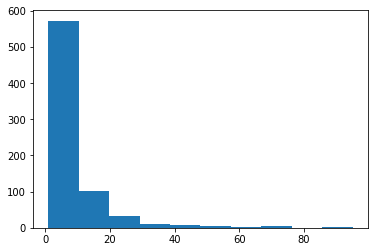

In [35]:
# Split the script into lines: lines
lines = holy_grail.split('\n')

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, "\w+") for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()

In [1]:
from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer 
stem = PorterStemmer()

In [2]:
words = ['women', 'men', 'woman' ,'children', 'stories' ,'mother' ,'father' ,'girls', 'felt', 'girl'] 
for i in words:
    t = lem.lemmatize(i)
    print(t)

woman
men
woman
child
story
mother
father
girl
felt
girl
